In [ ]:
from PIL import Image
import numpy
from numpy import asarray
import glob
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

import pickle

# Préparation des données


## Avec nos données non augmentées

In [ ]:
# données non augmentées

from google.colab import drive

drive.mount('/content/gdrive')

!unzip '/content/gdrive/MyDrive/data_annot.zip' 



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Archive:  /content/gdrive/MyDrive/data_annot.zip
replace data_annot/1/813.tif? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
##premiers tests sur une image

# load and show an image with Pillow
# Open the image form working directory
image = Image.open('data_annot/6/81.tif')
# summarize some details about the image
print(image.format)
print(image.size)
print(image.mode)

# convert image to numpy array
data = numpy.asarray(image)
print(type(data))
# summarize shape
print(data.shape)

TIFF
(60, 60)
L
<class 'numpy.ndarray'>
(60, 60)


In [ ]:
#constitution données total

list_label=[]
list_image=[]

for filename in glob.glob('data_annot/1/*.tif'):
    im=Image.open(filename)
    im_array = numpy.asarray(im)
    list_image.append(im_array)
    list_label.append(1)

for filename in glob.glob('data_annot/2/*.tif'):
    im=Image.open(filename)
    im_array = numpy.asarray(im)
    list_image.append(im_array)
    list_label.append(2)
    
for filename in glob.glob('data_annot/3/*.tif'):
    im=Image.open(filename)
    im_array = numpy.asarray(im)
    list_image.append(im_array)
    list_label.append(3)
    
for filename in glob.glob('data_annot/4/*.tif'):
    im=Image.open(filename)
    im_array = numpy.asarray(im)
    list_image.append(im_array)
    list_label.append(4)
    
for filename in glob.glob('data_annot/5/*.tif'):
    im=Image.open(filename)
    im_array = numpy.asarray(im)
    list_image.append(im_array)
    list_label.append(5)
    
for filename in glob.glob('data_annot/6/*.tif'):
    im=Image.open(filename)
    im_array = numpy.asarray(im)
    list_image.append(im_array)
    list_label.append(6)




In [ ]:
#matplotlib.pyplot.imshow(list_image[1])

In [ ]:
array_images = numpy.asarray(list_image)
print(array_images.shape)
print(len(list_label))

array_images= array_images.reshape(len(array_images),-1)

print(array_images.shape)

(819, 60, 60)
819
(819, 3600)


In [ ]:
print(array_images.min())
print(array_images.max())

# Conversion to float
array_images = array_images.astype('float32') 


# Normalization
array_images = array_images/255.0


print(array_images.min())
print(array_images.max())

0
255
0.0
1.0


In [ ]:
X_train_img, X_test_img, y_train_img, y_test_img = train_test_split(array_images,list_label, test_size=0.33,random_state=10)

## données augmentées

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
!ls '/content/gdrive/MyDrive'
!unzip '/content/gdrive/MyDrive/data_aug_new.zip'

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: data_aug_new/aug_training/2/1007.tif  
  inflating: data_aug_new/aug_training/2/1008.tif  
  inflating: data_aug_new/aug_training/2/1009.tif  
  inflating: data_aug_new/aug_training/2/1010.tif  
  inflating: data_aug_new/aug_training/2/1011.tif  
  inflating: data_aug_new/aug_training/2/1012.tif  
  inflating: data_aug_new/aug_training/2/1013.tif  
  inflating: data_aug_new/aug_training/2/1014.tif  
  inflating: data_aug_new/aug_training/2/1015.tif  
  inflating: data_aug_new/aug_training/2/1016.tif  
  inflating: data_aug_new/aug_training/2/1017.tif  
  inflating: data_aug_new/aug_training/2/1018.tif  
  inflating: data_aug_new/aug_training/2/1019.tif  
  inflating: data_aug_new/aug_training/2/1020.tif  
  inflating: data_aug_new/aug_training/2/1021.tif  
  inflating: data_aug_new/aug_training/2/1022.tif  
  inflating: data_aug_new/aug_training/2/1023.tif  
  inflating: data_aug_new/aug_training

In [ ]:
list_label=[]
list_image=[]

for filename in glob.glob('data_aug_new/aug_testing/1/*.tif'):
    im=Image.open(filename)
    im_array = asarray(im)
    list_image.append(im_array)
    list_label.append(1)

for filename in glob.glob('data_aug_new/aug_testing/2/*.tif'):
    im=Image.open(filename)
    im_array = asarray(im)
    list_image.append(im_array)
    list_label.append(2)
    
for filename in glob.glob('data_aug_new/aug_testing/3/*.tif'):
    im=Image.open(filename)
    im_array = asarray(im)
    list_image.append(im_array)
    list_label.append(3)
    
for filename in glob.glob('data_aug_new/aug_testing/4/*.tif'):
    im=Image.open(filename)
    im_array = asarray(im)
    list_image.append(im_array)
    list_label.append(4)
    
for filename in glob.glob('data_aug_new/aug_testing/5/*.tif'):
    im=Image.open(filename)
    im_array = asarray(im)
    list_image.append(im_array)
    list_label.append(5)
    
for filename in glob.glob('data_aug_new/aug_testing/6/*.tif'):
    im=Image.open(filename)
    im_array = asarray(im)
    list_image.append(im_array)
    list_label.append(6)



for filename in glob.glob('data_aug_new/aug_training/1/*.tif'):
    im=Image.open(filename)
    im_array = asarray(im)
    list_image.append(im_array)
    list_label.append(1)

for filename in glob.glob('data_aug_new/aug_training/2/*.tif'):
    im=Image.open(filename)
    im_array = asarray(im)
    list_image.append(im_array)
    list_label.append(2)
    
for filename in glob.glob('data_aug_new/aug_training/3/*.tif'):
    im=Image.open(filename)
    im_array = asarray(im)
    list_image.append(im_array)
    list_label.append(3)
    
for filename in glob.glob('data_aug_new/aug_training/4/*.tif'):
    im=Image.open(filename)
    im_array = asarray(im)
    list_image.append(im_array)
    list_label.append(4)
    
for filename in glob.glob('data_aug_new/aug_training/5/*.tif'):
    im=Image.open(filename)
    im_array = asarray(im)
    list_image.append(im_array)
    list_label.append(5)
    
for filename in glob.glob('data_aug_new/aug_training/6/*.tif'):
    im=Image.open(filename)
    im_array = asarray(im)
    list_image.append(im_array)
    list_label.append(6)

print(len(list_image))
print(len(list_label))

12000
12000


In [ ]:
array_images = asarray(list_image)
print(array_images.shape)
print(len(list_label))

array_images= array_images.reshape(len(array_images),-1)

print(array_images.shape)

print(array_images.min())
print(array_images.max())

# Conversion to float
array_images = array_images.astype('float32') 

# Normalization
array_images = array_images/255.0


print(array_images.min())
print(array_images.max())

images_final_aug=array_images
labels_aug=list_label

X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(images_final_aug,labels_aug, test_size=0.33,random_state=10)

print(len(X_train_aug))
print(len(X_test_aug))
print(len(y_train_aug))
print(len(y_test_aug))

(12000, 60, 60)
12000
(12000, 3600)
0
255
0.0
1.0
8040
3960
8040
3960


#Classification

## data non augmentées

In [ ]:
#MultinomialNB

MNB = MultinomialNB().fit(X_train_img, y_train_img) 
MNB_sol=MNB.predict(X_test_img)

print(sklearn.metrics.confusion_matrix(y_test_img,MNB_sol))
print(sklearn.metrics.accuracy_score(y_test_img,MNB_sol))
print(sklearn.metrics.mean_squared_error(y_test_img,MNB_sol))
print(sklearn.metrics.r2_score(y_test_img,MNB_sol))

[[  0   0   0   1   0]
 [  0   0   0   2   8]
 [  0   0   0   4  14]
 [  0   1   0   9  68]
 [  0   1   2  13 148]]
0.5793357933579336
0.9261992619926199
-0.4328656892483993


In [ ]:
#RandomForestClassifier

RF=RandomForestClassifier(random_state=10).fit(X_train_img, y_train_img)
RF_sol= RF.predict(X_test_img)

print(sklearn.metrics.confusion_matrix(y_test_img,RF_sol))
print(sklearn.metrics.accuracy_score(y_test_img,RF_sol))
print(sklearn.metrics.mean_squared_error(y_test_img,RF_sol))
print(sklearn.metrics.r2_score(y_test_img,RF_sol))

[[  0   0   1   0   0]
 [  0   0   0   2   8]
 [  0   0   1   4  13]
 [  0   0   0  11  67]
 [  0   0   0   9 155]]
0.6162361623616236
0.7970479704797048
-0.23306370070778581


In [ ]:
#DecisionTreeClassifier

TREE = tree.DecisionTreeClassifier(random_state=10).fit(X_train_img, y_train_img)
TREE_sol= TREE.predict(X_test_img)

print(sklearn.metrics.confusion_matrix(y_test_img,TREE_sol))
print(sklearn.metrics.accuracy_score(y_test_img,TREE_sol))
print(sklearn.metrics.mean_squared_error(y_test_img,TREE_sol))
print(sklearn.metrics.r2_score(y_test_img,TREE_sol))

[[ 0  0  0  1  0]
 [ 1  1  2  4  2]
 [ 0  1  2  6  9]
 [ 0  4  4 38 32]
 [ 0  7 15 53 89]]
0.4797047970479705
1.169741697416974
-0.809635153353556


In [ ]:
#KNeighborsClassifier
KNN6=KNeighborsClassifier(n_neighbors=6).fit(X_train_img, y_train_img)
KNN6_sol=KNN6.predict(X_test_img)

print(sklearn.metrics.confusion_matrix(y_test_img,KNN6_sol))
print(sklearn.metrics.accuracy_score(y_test_img,KNN6_sol))
print(sklearn.metrics.mean_squared_error(y_test_img,KNN6_sol))
print(sklearn.metrics.r2_score(y_test_img,KNN6_sol))

[[  0   0   1   0   0]
 [  0   0   0   3   7]
 [  0   0   0   6  12]
 [  0   3   2  22  51]
 [  0   1   7  28 128]]
0.5535055350553506
0.9704797047970479
-0.5013692281766096


In [ ]:
#MLPClassifier

MLP=MLPClassifier(hidden_layer_sizes=(40,20),activation="logistic" , solver='adam',random_state=10).fit(X_train_img, y_train_img)
MLP_sol=MLP.predict(X_test_img)

print(sklearn.metrics.confusion_matrix(y_test_img,MLP_sol))
print(sklearn.metrics.accuracy_score(y_test_img,MLP_sol))
print(sklearn.metrics.mean_squared_error(y_test_img,MLP_sol))
print(sklearn.metrics.r2_score(y_test_img,MLP_sol))

[[  0   0   0   1   0]
 [  0   0   0   2   8]
 [  0   0   0   5  13]
 [  0   0   0  27  51]
 [  0   0   0  25 139]]
0.6125461254612546
0.8191881918819188
-0.26731547017189095


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Trop peu de données pour arriver à un résultat correcte, particulièrement sur les omatidies qui ont de 1 à 4 récepteurs. Les classifieurs ont une accuracy correcte, mais seulement car ils apprenent que la plupart des images ont 6 récepteurs, ils ont donc de "bons" résultats en prédisant presqu toujour 6.

## data augmentées

In [ ]:
#MultinomialNB

MNB_aug = MultinomialNB().fit(X_train_aug, y_train_aug) 
MNB_aug_sol=MNB_aug.predict(X_test_aug)

print(sklearn.metrics.confusion_matrix(y_test_aug,MNB_aug_sol))
print(sklearn.metrics.accuracy_score(y_test_aug,MNB_aug_sol))
print(sklearn.metrics.mean_squared_error(y_test_aug,MNB_aug_sol))
print(sklearn.metrics.r2_score(y_test_aug,MNB_aug_sol))

[[675   0   0   0   0   0]
 [166 286  29  62  92  44]
 [  0 164  98 146 144 105]
 [ 19 188  75 103 127 125]
 [  9 120  79  94 189 149]
 [  6  97  62 110 215 182]]
0.38712121212121214
2.557828282828283
0.1349050542054424


In [ ]:
#RandomForestClassifier

RF_aug=RandomForestClassifier(random_state=10).fit(X_train_aug, y_train_aug)
RF_aug_sol= RF_aug.predict(X_test_aug)

print(sklearn.metrics.confusion_matrix(y_test_aug,RF_aug_sol))
print(sklearn.metrics.accuracy_score(y_test_aug ,RF_aug_sol))
print(sklearn.metrics.mean_squared_error(y_test_aug,RF_aug_sol))
print(sklearn.metrics.r2_score(y_test_aug,RF_aug_sol))

[[675   0   0   0   0   0]
 [  0 679   0   0   0   0]
 [  0   0 570  36  23  28]
 [  0  18  29 462  38  90]
 [  0  13  51 117 311 148]
 [  0   4  30 113 130 395]]
0.7808080808080808
0.6012626262626263
0.7966441834399406


In [ ]:
#DecisionTreeClassifier

TREE_aug = tree.DecisionTreeClassifier(random_state=10).fit(X_train_aug, y_train_aug)
TREE_aug_sol= TREE_aug.predict(X_test_aug)

print(sklearn.metrics.confusion_matrix(y_test_aug,TREE_aug_sol))
print(sklearn.metrics.accuracy_score(y_test_aug ,TREE_aug_sol))
print(sklearn.metrics.mean_squared_error(y_test_aug,TREE_aug_sol))
print(sklearn.metrics.r2_score(y_test_aug,TREE_aug_sol))

[[675   0   0   0   0   0]
 [  0 646  11   5   9   8]
 [  0   7 416  76  88  70]
 [  0   7  86 314 126 104]
 [  1  20 105 111 240 163]
 [  0   8  81 104 193 286]]
0.6507575757575758
1.090151515151515
0.6312948088661166


In [ ]:
#KNeighborsClassifier
KNN6_aug=KNeighborsClassifier(n_neighbors=6).fit(X_train_aug, y_train_aug)
KNN6_aug_sol=KNN6_aug.predict(X_test_aug)

print(sklearn.metrics.confusion_matrix(y_test_aug,KNN6_aug_sol))
print(sklearn.metrics.accuracy_score(y_test_aug ,KNN6_aug_sol))
print(sklearn.metrics.mean_squared_error(y_test_aug,KNN6_aug_sol))
print(sklearn.metrics.r2_score(y_test_aug,KNN6_aug_sol))

[[675   0   0   0   0   0]
 [  0 679   0   0   0   0]
 [  0  47 543  23  26  18]
 [  0  61 175 320  43  38]
 [  0  19 134 132 257  98]
 [  0   7 117 126 178 244]]
0.6863636363636364
0.942929292929293
0.6810875182548249


In [ ]:
#MLPClassifier

MLP_aug=MLPClassifier(hidden_layer_sizes=(40,20),activation="logistic" , solver='adam',random_state=10).fit(X_train_aug, y_train_aug)
MLP_aug_sol=MLP_aug.predict(X_test_aug)

print(sklearn.metrics.confusion_matrix(y_test_aug,MLP_aug_sol))
print(sklearn.metrics.accuracy_score(y_test_aug ,MLP_aug_sol))
print(sklearn.metrics.mean_squared_error(y_test_aug,MLP_aug_sol))
print(sklearn.metrics.r2_score(y_test_aug,MLP_aug_sol))

[[675   0   0   0   0   0]
 [  0 679   0   0   0   0]
 [  0   5 494  87  70   1]
 [  0   8  65 377 119  68]
 [  0   5  53 101 283 198]
 [  0   2  33  78 182 377]]
0.7285353535353535
0.5676767676767677
0.808003412168411


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Les résultats sont intéréssant: les classifieurs n'ont aucun problème à classer les images avec 1 ou 2 récepteurs, car celle ci ont été augmentées à partir d'un nombre d'image très réduit. La plus grosse difficulté semble être de différencier les images avec 5 ou 6 récepteurs.

A noter que à l'exception du MultinomialNB, les autre méthodes assignent les éléments d'une classe (ligne de la matrice) dans a classe correcte (colonne) en majorité.

Les meilleurs résultats sont obtenus avec le modèle Random Forest (plus haute accuracy et plus faible mean_squared_error).

Nous allons donc ajuster ce modèle pour choisir les meilleurs paramètres, at ainsi amméliorer le réultat.

### Amélioration Random Forest

On modifie certains paramètres pour voir si l'on peut parvenir à un mailleur résultata qu'avec les paramètres par défaut.

In [ ]:
#1ère tentative d'amélioration

RF_grid=RandomForestClassifier()

parameters_rf= {'max_depth':(None, 10,20,30),
             'min_samples_leaf':(1,10,20,30),
             'max_leaf_nodes':(None,10,20,30)
             }


Grid_random_forest = GridSearchCV(RF_grid,parameters_rf)
Grid_random_forest.fit(images_final_aug,labels_aug)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': (None, 10, 20, 30),
                         'max_leaf_nodes': (None, 10, 20, 30),
                         'min_samples_leaf': (1, 10, 20, 30)})

In [ ]:
results_grid=pd.DataFrame(Grid_random_forest.cv_results_)
results_grid=results_grid.sort_values(by = 'rank_test_score')
results_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
48,24.311927,0.157719,0.133313,0.001592,30,None,1,"{'max_depth': 30, 'max_leaf_nodes': None, 'min...",0.786250,0.778333,0.810417,0.775000,0.779583,0.785917,0.012784,1
0,26.825388,0.549644,0.152948,0.041512,None,None,1,"{'max_depth': None, 'max_leaf_nodes': None, 'm...",0.786250,0.775000,0.798750,0.773333,0.790417,0.784750,0.009547,2
32,23.430487,0.096582,0.131964,0.003388,20,None,1,"{'max_depth': 20, 'max_leaf_nodes': None, 'min...",0.778333,0.775833,0.792083,0.779167,0.775417,0.780167,0.006127,3
49,19.202811,0.096058,0.112468,0.003280,30,None,10,"{'max_depth': 30, 'max_leaf_nodes': None, 'min...",0.737917,0.720000,0.747917,0.724583,0.741250,0.734333,0.010447,4
1,20.939124,0.077765,0.113633,0.004271,None,None,10,"{'max_depth': None, 'max_leaf_nodes': None, 'm...",0.741250,0.720000,0.755000,0.717083,0.738333,0.734333,0.014099,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,8.382051,0.011741,0.057673,0.000973,30,10,10,"{'max_depth': 30, 'max_leaf_nodes': 10, 'min_s...",0.507083,0.522083,0.515000,0.520417,0.518750,0.516667,0.005336,60
20,8.380438,0.019947,0.059996,0.002617,10,10,1,"{'max_depth': 10, 'max_leaf_nodes': 10, 'min_s...",0.522917,0.513333,0.518333,0.510417,0.518333,0.516667,0.004354,61
7,8.369384,0.030660,0.058450,0.002896,None,10,30,"{'max_depth': None, 'max_leaf_nodes': 10, 'min...",0.519167,0.517917,0.515833,0.506250,0.524167,0.516667,0.005887,61
23,8.864657,0.948766,0.057231,0.000311,10,10,30,"{'max_depth': 10, 'max_leaf_nodes': 10, 'min_s...",0.520417,0.510417,0.511667,0.509583,0.526667,0.515750,0.006695,63


In [ ]:
#rf v2
RF_v2=RandomForestClassifier(max_depth=30,random_state=10).fit(X_train_aug, y_train_aug)
RF_v2_sol= RF_v2.predict(X_test_aug)

print(sklearn.metrics.confusion_matrix(y_test_aug,RF_v2_sol))
print(sklearn.metrics.accuracy_score(y_test_aug ,RF_v2_sol))
print(sklearn.metrics.mean_squared_error(y_test_aug,RF_v2_sol))
print(sklearn.metrics.r2_score(y_test_aug,RF_v2_sol))

[[675   0   0   0   0   0]
 [  0 679   0   0   0   0]
 [  0   0 593  15  22  27]
 [  0   9  32 473  51  72]
 [  0  11  40 106 324 159]
 [  0   0  35  78 140 419]]
0.7987373737373737
0.5161616161616162
0.8254265900677189


In [ ]:
#2ème tentative d'amélioration,
RF_grid2=RandomForestClassifier(max_depth=30)

parameters_rf2= {'n_estimators':(75,100,125,150,175,200),
             'criterion':('gini', 'entropy')
             }

Grid_random_forest2 = GridSearchCV(RF_grid2,parameters_rf2)
Grid_random_forest2.fit(images_final_aug,labels_aug)


GridSearchCV(estimator=RandomForestClassifier(max_depth=30),
             param_grid={'criterion': ('gini', 'entropy'),
                         'n_estimators': (75, 100, 125, 150, 175, 200)})

In [ ]:
results_grid2=pd.DataFrame(Grid_random_forest2.cv_results_)
results_grid2=results_grid2.sort_values(by = 'rank_test_score')
results_grid2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,72.740191,1.079789,0.258529,0.007781,entropy,200,"{'criterion': 'entropy', 'n_estimators': 200}",0.801250,0.795417,0.808750,0.788750,0.792917,0.797417,0.006964,1
10,63.728522,1.148169,0.222172,0.003781,entropy,175,"{'criterion': 'entropy', 'n_estimators': 175}",0.803333,0.783750,0.816667,0.790417,0.789167,0.796667,0.011888,2
5,49.330484,0.870807,0.274468,0.011654,gini,200,"{'criterion': 'gini', 'n_estimators': 200}",0.797500,0.786667,0.812917,0.789583,0.795833,0.796500,0.009116,3
4,43.574109,1.089974,0.266963,0.045435,gini,175,"{'criterion': 'gini', 'n_estimators': 175}",0.800000,0.779167,0.814167,0.785833,0.797083,0.795250,0.012092,4
9,54.764361,1.177347,0.195185,0.007188,entropy,150,"{'criterion': 'entropy', 'n_estimators': 150}",0.798333,0.781667,0.815000,0.779583,0.791250,0.793167,0.012836,5
3,36.889576,0.264881,0.209826,0.004898,gini,150,"{'criterion': 'gini', 'n_estimators': 150}",0.794583,0.782917,0.806667,0.787083,0.792500,0.792750,0.008073,6
2,30.895479,0.995364,0.168660,0.002701,gini,125,"{'criterion': 'gini', 'n_estimators': 125}",0.798750,0.776667,0.803333,0.777083,0.792917,0.789750,0.011020,7
8,45.140929,0.145557,0.163932,0.003723,entropy,125,"{'criterion': 'entropy', 'n_estimators': 125}",0.795417,0.768333,0.811250,0.779167,0.788333,0.788500,0.014555,8
1,24.513254,0.395930,0.142377,0.004442,gini,100,"{'criterion': 'gini', 'n_estimators': 100}",0.786250,0.772083,0.803333,0.777083,0.798750,0.787500,0.012042,9
0,18.406596,0.201939,0.104433,0.001116,gini,75,"{'criterion': 'gini', 'n_estimators': 75}",0.782083,0.775833,0.807500,0.777500,0.773333,0.783250,0.012457,10


In [ ]:
#rf v3
RF_v3=RandomForestClassifier(max_depth=30,n_estimators=200,criterion='entropy',random_state=10).fit(X_train_aug, y_train_aug)
RF_v3_sol= RF_v3.predict(X_test_aug)

print(sklearn.metrics.confusion_matrix(y_test_aug,RF_v3_sol))
print(sklearn.metrics.accuracy_score(y_test_aug ,RF_v3_sol))
print(sklearn.metrics.mean_squared_error(y_test_aug,RF_v3_sol))
print(sklearn.metrics.r2_score(y_test_aug,RF_v3_sol))

[[675   0   0   0   0   0]
 [  0 679   0   0   0   0]
 [  0   0 584  34  20  19]
 [  0  11  19 480  36  91]
 [  0  11  55 125 302 147]
 [  0   3  31 107 107 424]]
0.793939393939394
0.5558080808080809
0.8120175757040358


Légère amélioration, cependant on est loin d'avoir exploré toutes les combinaisons de paramètres possibles. On gardera toutefois ce modèle comme étant le meilleur des classifieurs 

### Méthodes multiclasses avec RF
https://scikit-learn.org/stable/modules/multiclass.html

On reprend la méthode des random forest, mais en utilisant des méthodes multiclasses:

In [ ]:
### one vs all

one_vs_all = OneVsRestClassifier(RandomForestClassifier(max_depth=30,n_estimators=200,criterion='entropy',random_state=10)).fit(X_train_aug, y_train_aug)
sol_one_vs_all=one_vs_all.predict(X_test_aug)

print(sklearn.metrics.confusion_matrix(y_test_aug,sol_one_vs_all))
print(sklearn.metrics.accuracy_score(y_test_aug,sol_one_vs_all))
print(sklearn.metrics.mean_squared_error(y_test_aug,sol_one_vs_all))
print(sklearn.metrics.r2_score(y_test_aug,sol_one_vs_all))

### one vs one

one_vs_one = OneVsOneClassifier(RandomForestClassifier(max_depth=30,n_estimators=200,criterion='entropy',random_state=10)).fit(X_train_aug, y_train_aug)
sol_one_vs_one = one_vs_one.predict(X_test_aug)

print(sklearn.metrics.confusion_matrix(y_test_aug,sol_one_vs_one))
print(sklearn.metrics.accuracy_score(y_test_aug,sol_one_vs_one))
print(sklearn.metrics.mean_squared_error(y_test_aug,sol_one_vs_one))
print(sklearn.metrics.r2_score(y_test_aug,sol_one_vs_one))

[[675   0   0   0   0   0]
 [  0 679   0   0   0   0]
 [  0   0 568  49  20  20]
 [  0  11  31 479  36  80]
 [  0   6  53 105 335 141]
 [  0   4  24  92 118 434]]
0.8005050505050505
0.5095959595959596
0.8276471911725326
[[675   0   0   0   0   0]
 [  0 679   0   0   0   0]
 [  0   0 539  53  34  31]
 [  0   6  20 479  46  86]
 [  0   4  44 114 322 156]
 [  0   2  16 100 129 425]]
0.7876262626262627
0.5275252525252525
0.8215832420016951


In [ ]:
#FINAL: exportation meilleur modèle:
'''
one_vs_all = OneVsRestClassifier(RandomForestClassifier(max_depth=30,n_estimators=200,criterion='entropy')).fit(X_train_aug, y_train_aug)
sol_one_vs_all=one_vs_all.predict(X_test_aug)
'''

pickle.dump(one_vs_all,open('./RF_classifier_model','wb'))


# Modèles linéaires

## régression linéaire

In [ ]:
lr = LinearRegression().fit(X_train_aug,y_train_aug)
lr_sol=lr.predict(X_test_aug)

print(sklearn.metrics.mean_squared_error(y_test_aug,lr_sol))
print(sklearn.metrics.r2_score(y_test_aug,lr_sol))

2.137812052682393
0.27696068799846607


In [ ]:
lr_sol_round=[]
for i in lr_sol:
  lr_sol_round.append(round(i))
print(lr_sol[0:10])
print(lr_sol_round[0:10])

[3.7626867 5.6659    2.9649115 3.8297424 4.514777  6.4028845 4.914365
 3.3902702 1.3178841 3.213863 ]
[4, 6, 3, 4, 5, 6, 5, 3, 1, 3]


In [ ]:
print(sklearn.metrics.confusion_matrix(y_test_aug,lr_sol_round))
print(sklearn.metrics.accuracy_score(y_test_aug ,lr_sol_round))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  20 385 254  16   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2  56 326 238  56   1   0   0   0   0   0   0   0   0   0]
 [  0   5  24  89 194 205  75  45  15   3   1   1   0   0   0   0]
 [  1   3  19  92 162 174 112  45  21   6   1   1   0   0   0   0]
 [  1   1  13  41 116 143 133  94  54  31   5   6   1   1   0   0]
 [  0   0  11  35  82 137 177 131  51  35   7   3   1   0   1   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

Text(0, 0.5, 'Nombre de récepteursprédits par la régression linéaire')

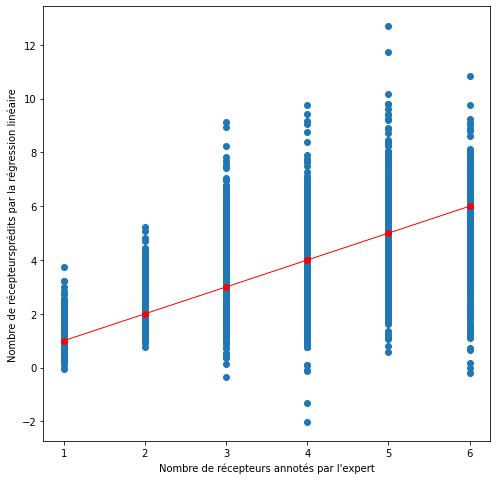

In [ ]:
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.scatter(y_test_aug, lr_sol)
plt.plot(1,1, marker="o", color="red")
plt.plot(2,2, marker="o", color="red")
plt.plot(3,3, marker="o", color="red")
plt.plot(4,4, marker="o", color="red")
plt.plot(5,5, marker="o", color="red")
plt.plot(6,6, marker="o", color="red")
plt.plot([1, 6], [1, 6], 'r-', lw=1)

plt.xlabel("Nombre de récepteurs annotés par l'expert") 
plt.ylabel('Nombre de récepteursprédits par la régression linéaire')

ValueError: ignored

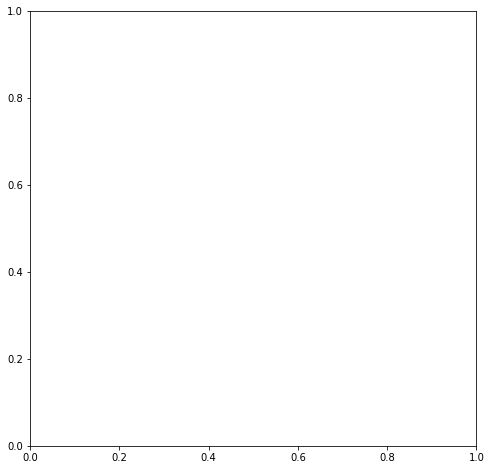

In [ ]:
#violin_plot
fig_1bis, ax1_bis = plt.subplots(figsize=(8,8))


vp = ax1_bis.violinplot(lr_sol,[1,2,3,4,5,6])

Les résultats ne sont pas très probant sur les variables normalisés. On a une mean squre error de 2.09 avec la régression linéaire, alors que l'on arrive à 0.6 avec les classifieurs, et le r2score est très bas. De plus, on voit sur le graphe de nombreuses valeures aberrantes.

On aurait pu penser que la relation entre la valeur des pixels et le nombre de récepteur était linéaire: plus les pixels sont blancs, plus il y a de la chance d'y avoir un grand nombre de récepteur. Au vu des résultats, ce n'est visiblement pas le cas.

## Régression logistique

In [ ]:
#LogisticRegression

log_r=LogisticRegression(random_state=10).fit(X_train_aug,y_train_aug)
log_r_sol=log_r.predict(X_test_aug)

print(sklearn.metrics.confusion_matrix(y_test_aug,log_r_sol))
print(sklearn.metrics.accuracy_score(y_test_aug,log_r_sol))
print(sklearn.metrics.mean_squared_error(y_test_aug,log_r_sol))
print(sklearn.metrics.r2_score(y_test_aug,log_r_sol))

[[675   0   0   0   0   0]
 [  0 671   0   8   0   0]
 [  0  60 319 142  89  47]
 [  0 109 178 144  99 107]
 [  0  61 132 116 187 144]
 [  0  19 137  97 181 238]]
0.5641414141414142
1.4133838383838384
0.5219729083214395


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Arbre de decision

1er essai

In [ ]:
dt = DecisionTreeRegressor(random_state=10).fit(X_train_aug,y_train_aug)
dt_sol=dt.predict(X_test_aug)

print(sklearn.metrics.confusion_matrix(y_test_aug,dt_sol))
print(sklearn.metrics.accuracy_score(y_test_aug,dt_sol))
print(sklearn.metrics.mean_squared_error(y_test_aug,dt_sol))
print(sklearn.metrics.r2_score(y_test_aug,dt_sol))

[[673   2   0   0   0   0]
 [  1 655   9  10   3   1]
 [  0  21 402  94  81  59]
 [  0  14 104 279 137 103]
 [  0  20 104 137 210 169]
 [  0   3  76 129 181 283]]
0.6318181818181818
1.0366161616161615
0.6494012486438288


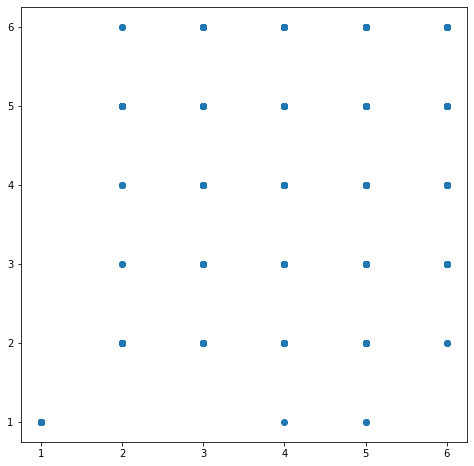

In [ ]:
fig2, ax2 = plt.subplots(figsize=(8,8))
ax2.scatter(y_test_aug,dt_sol)

In [ ]:
#test ovefitting
dt_sol_over=dt.predict(X_train_aug)
print(sklearn.metrics.confusion_matrix(y_train_aug,dt_sol_over))
print(sklearn.metrics.mean_squared_error(y_train_aug,dt_sol_over))
print(sklearn.metrics.r2_score(y_train_aug,dt_sol_over))

[[1369    0    0    0    0    0]
 [   0 1353    0    0    0    0]
 [   0    0 1302    0    0    0]
 [   0    0    0 1372    0    0]
 [   0    0    0    0 1345    0]
 [   0    0    0    0    0 1299]]
0.0
1.0


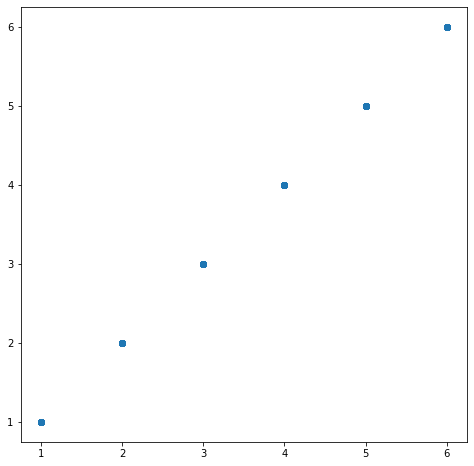

In [ ]:
fig3, ax3 = plt.subplots(figsize=(8,8))
ax3.scatter(y_train_aug,dt_sol_over)

On a un overfitting bien trop important avec les paramètres par défaut

In [ ]:

DT_grid=DecisionTreeRegressor()
parameters_dt= {'max_depth':(None, 10,20),
             'min_samples_leaf':(10,20,30),
             'max_leaf_nodes':(None,10,20,30)
             }

Grid_decision_tree = GridSearchCV(DT_grid,parameters_dt)
Grid_decision_tree.fit(images_final_aug,labels_aug)

KeyboardInterrupt: ignored

In [ ]:
results_grid_DT=pd.DataFrame(Grid_decision_tree.cv_results_)
results_grid_DT

AttributeError: ignored

In [ ]:
results_grid_DT=results_grid_DT.sort_values(by = 'rank_test_score')
results_grid_DT

2ème eme essai

In [ ]:
dt_v2 = DecisionTreeRegressor(max_depth=20, max_leaf_nodes=30, min_samples_leaf=30,random_state=10).fit(X_train_aug,y_train_aug)
dt_v2_sol=dt_v2.predict(X_test_aug)

print(sklearn.metrics.mean_squared_error(y_test_aug,dt_v2_sol))
print(sklearn.metrics.r2_score(y_test_aug,dt_v2_sol))

0.8817666347687899
0.7017736240427809


In [ ]:
dt_v2_sol_round=[]
for i in dt_v2_sol:
  dt_v2_sol_round.append(round(i))
print(dt_v2_sol[0:10])
print(dt_v2_sol_round[0:10])

[5.36435868 5.36435868 4.72040816 4.39375    4.72040816 5.36435868
 4.14316703 3.6        1.03535354 2.35795455]
[5, 5, 5, 4, 5, 5, 4, 4, 1, 2]


In [ ]:
print(sklearn.metrics.accuracy_score(y_test_aug,dt_v2_sol_round))
print(sklearn.metrics.confusion_matrix(y_test_aug,dt_v2_sol_round))

0.4863636363636364
[[671   4   0   0   0   0]
 [ 25 553  52  48   1   0]
 [  4  93  53 333 174   0]
 [  1  36  32 306 262   0]
 [  3  27  11 256 343   0]
 [  1   8   7 176 480   0]]


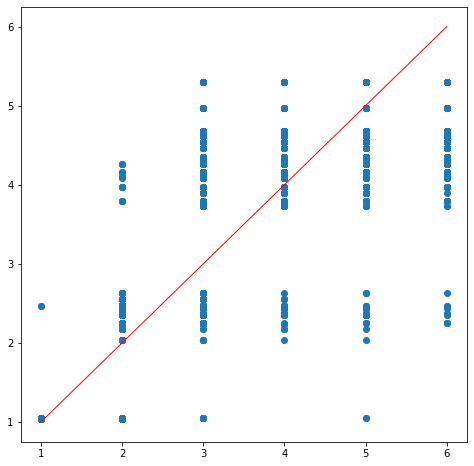

In [ ]:
fig4, ax4 = plt.subplots(figsize=(8,8))
ax4.scatter(y_test_aug,dt_v2_sol)
plt.plot([1, 6], [1, 6], 'r-', lw=1)


In [ ]:
#test ovefitting v2
dt_v2_sol_over=dt_v2.predict(X_train_aug)

print(sklearn.metrics.mean_squared_error(y_train_aug,dt_v2_sol_over))
print(sklearn.metrics.r2_score(y_train_aug,dt_v2_sol_over))

0.7765294988606314
0.7333192315201542


Overfitting réduit et résltats améliorés
Mais on peut peut être encore faire mieux,
les meilleures paramètres semblent être:
- max_depth =20
- max_leaf_nodes = 30
- min_samples_leaf = 30

Ce sont les valeures les plus élevées, on peut peut être améliorer encore les résultats.

In [ ]:
#3ème essai

dt_v3 = DecisionTreeRegressor(max_depth=40, max_leaf_nodes=40, min_samples_leaf=40,random_state=10).fit(X_train_aug,y_train_aug)
dt_v3_sol=dt_v3.predict(X_test_aug)

print(sklearn.metrics.mean_squared_error(y_test_aug,dt_v3_sol))
print(sklearn.metrics.r2_score(y_test_aug,dt_v3_sol))

0.8547008159718632
0.7109276799276905


In [ ]:
dt_v3_sol_round=[]
for i in dt_v3_sol:
  dt_v3_sol_round.append(round(i))
print(dt_v3_sol[0:10])
print(dt_v3_sol_round[0:10])

[5.43276284 5.43276284 4.4556213  4.39375    4.4556213  5.43276284
 4.16515837 3.6        1.03535354 2.35795455]
[5, 5, 4, 4, 4, 5, 4, 4, 1, 2]


In [ ]:
print(sklearn.metrics.accuracy_score(y_test_aug,dt_v3_sol_round))
print(sklearn.metrics.confusion_matrix(y_test_aug,dt_v3_sol_round))

0.49015151515151517
[[671   4   0   0   0   0]
 [ 25 518 100  34   2   0]
 [  4  62  65 420 106   0]
 [  1  21  34 403 173   5]
 [  3  20  21 321 266   9]
 [  1   7   7 243 396  18]]


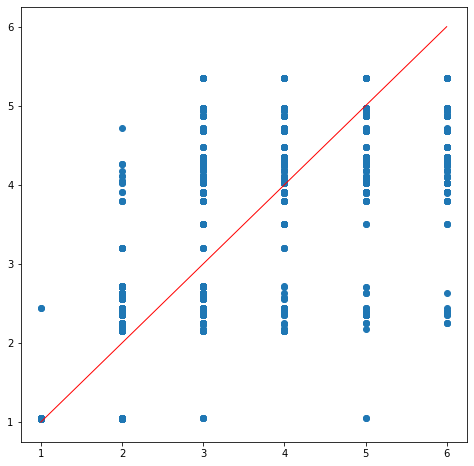

In [ ]:
fig5, ax5 = plt.subplots(figsize=(8,8))
ax5.scatter(y_test_aug,dt_v3_sol)
plt.plot([1, 6], [1, 6], 'r-', lw=1)

In [ ]:
#test ovefitting v3
dt_v3_sol_over=dt_v3.predict(X_train_aug)

print(sklearn.metrics.mean_squared_error(y_train_aug,dt_v3_sol_over))
print(sklearn.metrics.r2_score(y_train_aug,dt_v3_sol_over))


0.7194831542523688
0.7529104550878606


In [ ]:
#4ème essai
dt_v4 = DecisionTreeRegressor(max_depth=100, max_leaf_nodes=100, min_samples_leaf=100).fit(X_train_aug,y_train_aug)
dt_v4_sol=dt_v4.predict(X_test_aug)

print(sklearn.metrics.mean_squared_error(y_test_aug,dt_v4_sol))
print(sklearn.metrics.r2_score(y_test_aug,dt_v4_sol))

0.9052946795518816
0.6904217921102997


In [ ]:
#test ovefitting v4
dt_v4_sol_over=dt_v4.predict(X_train_aug)

print(sklearn.metrics.mean_squared_error(y_train_aug,dt_v4_sol_over))
print(sklearn.metrics.r2_score(y_train_aug,dt_v4_sol_over))


0.7358074875480912
0.7473042472688248


In [ ]:
#les résultats empires, voir ou on met les paramètres ente 30 et 100
#faire une fonction ou un grid_search pour voir ou les paramètres donnent un meilleur r2 et un plus petit mean square, 

## RandomForestRegressor

In [ ]:
#RandomForestRegressor

RFR=RandomForestRegressor(random_state=10).fit(X_train_aug,y_train_aug)
RFR_sol=RFR.predict(X_test_aug)


In [ ]:
print(sklearn.metrics.mean_squared_error(y_test_aug,RFR_sol))
print(sklearn.metrics.r2_score(y_test_aug,RFR_sol))

0.4433503787878788
0.8500524157620923


In [ ]:
RFR_sol_round=[]
for i in RFR_sol:
  RFR_sol_round.append(round(i))
print(RFR_sol[0:10])
print(RFR_sol_round[0:10])

[5.45 5.44 4.02 4.63 4.76 5.27 4.73 3.74 1.   2.6 ]
[5, 5, 4, 5, 5, 5, 5, 4, 1, 3]


In [ ]:
print(sklearn.metrics.accuracy_score(y_test_aug,RFR_sol_round))
print(sklearn.metrics.confusion_matrix(y_test_aug,RFR_sol_round))

0.6358585858585859
[[675   0   0   0   0   0]
 [  0 672   7   0   0   0]
 [  0   0 234 381  42   0]
 [  0   0  15 444 175   3]
 [  0   0   9 214 405  12]
 [  0   0   0  94 490  88]]


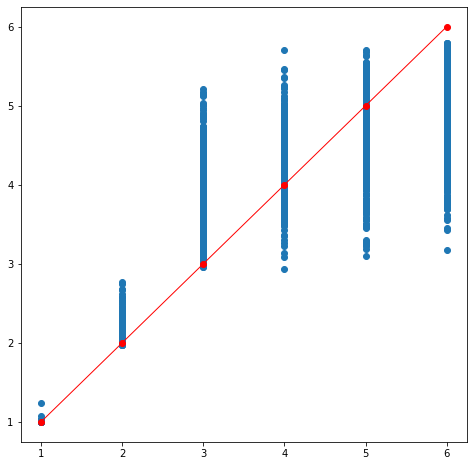

In [ ]:
figRFR, axRFR = plt.subplots(figsize=(8,8))
axRFR.scatter(y_test_aug,RFR_sol)
plt.plot(1,1, marker="o", color="red")
plt.plot(2,2, marker="o", color="red")
plt.plot(3,3, marker="o", color="red")
plt.plot(4,4, marker="o", color="red")
plt.plot(5,5, marker="o", color="red")
plt.plot(6,6, marker="o", color="red")
plt.plot([1, 6], [1, 6], 'r-', lw=1)


In [ ]:
#RandomForestRegressor optimisé

RFR2=RandomForestRegressor(max_depth=30,n_estimators=200,random_state=10).fit(X_train_aug,y_train_aug)
RFR2_sol=RFR2.predict(X_test_aug)

In [ ]:
print(sklearn.metrics.mean_squared_error(y_test_aug,RFR2_sol))
print(sklearn.metrics.r2_score(y_test_aug,RFR2_sol))

0.4443726069050386
0.8497066832578657


In [ ]:
RFR2_sol_round=[]
for i in RFR2_sol:
  RFR2_sol_round.append(round(i))
print(RFR2_sol[0:10])
print(RFR2_sol_round[0:10])

[5.50504156 5.46934807 3.95481567 4.665      4.775      5.25007045
 4.66       3.725      1.         2.66      ]
[6, 5, 4, 5, 5, 5, 5, 4, 1, 3]


In [ ]:
print(sklearn.metrics.accuracy_score(y_test_aug,RFR2_sol_round))
print(sklearn.metrics.confusion_matrix(y_test_aug,RFR2_sol_round))

0.6358585858585859
[[675   0   0   0   0   0]
 [  0 675   4   0   0   0]
 [  0   0 234 382  41   0]
 [  0   0  15 446 172   4]
 [  0   0  11 211 402  16]
 [  0   0   0  90 496  86]]


# Derniers tests avec image de synthèse


## Fluo modulées

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
!ls '/content/gdrive/MyDrive'
!unzip '/content/gdrive/MyDrive/sim_1.zip'

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: sim_1/training/2/1007.tif  
  inflating: sim_1/training/2/1008.tif  
  inflating: sim_1/training/2/1009.tif  
  inflating: sim_1/training/2/1010.tif  
  inflating: sim_1/training/2/1011.tif  
  inflating: sim_1/training/2/1012.tif  
  inflating: sim_1/training/2/1013.tif  
  inflating: sim_1/training/2/1014.tif  
  inflating: sim_1/training/2/1015.tif  
  inflating: sim_1/training/2/1016.tif  
  inflating: sim_1/training/2/1017.tif  
  inflating: sim_1/training/2/1018.tif  
  inflating: sim_1/training/2/1019.tif  
  inflating: sim_1/training/2/1020.tif  
  inflating: sim_1/training/2/1021.tif  
  inflating: sim_1/training/2/1022.tif  
  inflating: sim_1/training/2/1023.tif  
  inflating: sim_1/training/2/1024.tif  
  inflating: sim_1/training/2/1025.tif  
  inflating: sim_1/training/2/1026.tif  
  inflating: sim_1/training/2/1027.tif  
  inflating: sim_1/training/2/1028.tif  
  inflating: sim_1/t

In [ ]:
list_label_art=[]
list_image_art=[]

for filename in glob.glob('sim_1/testing/1/*.tif'):
    im=Image.open(filename)
    im_array = asarray(im)
    list_image_art.append(im_array)
    list_label_art.append(1)

for filename in glob.glob('sim_1/testing/2/*.tif'):
    im=Image.open(filename)
    im_array = asarray(im)
    list_image_art.append(im_array)
    list_label_art.append(2)
    
for filename in glob.glob('sim_1/testing/3/*.tif'):
    im=Image.open(filename)
    im_array = asarray(im)
    list_image_art.append(im_array)
    list_label_art.append(3)
    
for filename in glob.glob('sim_1/testing/4/*.tif'):
    im=Image.open(filename)
    im_array = asarray(im)
    list_image_art.append(im_array)
    list_label_art.append(4)
    
for filename in glob.glob('sim_1/testing/5/*.tif'):
    im=Image.open(filename)
    im_array = asarray(im)
    list_image_art.append(im_array)
    list_label_art.append(5)
    
for filename in glob.glob('sim_1/testing/6/*.tif'):
    im=Image.open(filename)
    im_array = asarray(im)
    list_image_art.append(im_array)
    list_label_art.append(6)



for filename in glob.glob('sim_1/training/1/*.tif'):
    im=Image.open(filename)
    im_array = asarray(im)
    list_image_art.append(im_array)
    list_label_art.append(1)

for filename in glob.glob('sim_1/training/2/*.tif'):
    im=Image.open(filename)
    im_array = asarray(im)
    list_image_art.append(im_array)
    list_label_art.append(2)
    
for filename in glob.glob('sim_1/training/3/*.tif'):
    im=Image.open(filename)
    im_array = asarray(im)
    list_image_art.append(im_array)
    list_label_art.append(3)
    
for filename in glob.glob('sim_1/training/4/*.tif'):
    im=Image.open(filename)
    im_array = asarray(im)
    list_image_art.append(im_array)
    list_label_art.append(4)
    
for filename in glob.glob('sim_1/training/5/*.tif'):
    im=Image.open(filename)
    im_array = asarray(im)
    list_image_art.append(im_array)
    list_label_art.append(5)
    
for filename in glob.glob('sim_1/training/6/*.tif'):
    im=Image.open(filename)
    im_array = asarray(im)
    list_image_art.append(im_array)
    list_label_art.append(6)

print(len(list_image_art))
print(len(list_label_art))

12000
12000


In [ ]:
array_images_art = asarray(list_image_art)
print(array_images_art.shape)
print(len(list_label_art))

array_images_art= array_images_art.reshape(len(array_images_art),-1)

print(array_images_art.shape)

print(array_images_art.min())
print(array_images_art.max())

# Conversion to float
array_images_art = array_images_art.astype('float32') 

# Normalization
array_images_art = array_images_art/255.0


print(array_images_art.min())
print(array_images_art.max())

images_final_art=array_images_art
labels_art=list_label_art


(12000, 60, 60)
12000
(12000, 3600)
0
220
0.0
0.8627451


In [ ]:
one_vs_all_art = OneVsRestClassifier(RandomForestClassifier(max_depth=30,n_estimators=200,criterion='entropy',random_state=10)).fit(images_final_art, labels_art)
sol_one_vs_all_art=one_vs_all_art.predict(X_test_aug)

print(sklearn.metrics.confusion_matrix(y_test_aug,sol_one_vs_all_art))
print(sklearn.metrics.accuracy_score(y_test_aug,sol_one_vs_all_art))
print(sklearn.metrics.mean_squared_error(y_test_aug,sol_one_vs_all_art))
print(sklearn.metrics.r2_score(y_test_aug,sol_one_vs_all_art))

[[  0 356 319   0   0   0]
 [  0   0 147 225 307   0]
 [  0   0  14 101 263 279]
 [  0   0   8  58 243 328]
 [  0   0   1  62 133 444]
 [  0   0   0   8 106 558]]
0.19267676767676767
2.8578282828282826
0.03344066526241407


## fluo uniforme

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
!ls '/content/gdrive/MyDrive'
!unzip '/content/gdrive/MyDrive/sim_hom.zip'

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: sim_hom/4/3502m.tif     
  inflating: sim_hom/4/3503d.tif     
  inflating: sim_hom/4/3503m.tif     
  inflating: sim_hom/4/3504d.tif     
  inflating: sim_hom/4/3504m.tif     
  inflating: sim_hom/4/3505d.tif     
  inflating: sim_hom/4/3505m.tif     
  inflating: sim_hom/4/3506d.tif     
  inflating: sim_hom/4/3506m.tif     
  inflating: sim_hom/4/3507d.tif     
  inflating: sim_hom/4/3507m.tif     
  inflating: sim_hom/4/3508d.tif     
  inflating: sim_hom/4/3508m.tif     
  inflating: sim_hom/4/3509d.tif     
  inflating: sim_hom/4/3509m.tif     
  inflating: sim_hom/4/3510d.tif     
  inflating: sim_hom/4/3510m.tif     
  inflating: sim_hom/4/3511d.tif     
  inflating: sim_hom/4/3511m.tif     
  inflating: sim_hom/4/3512d.tif     
  inflating: sim_hom/4/3512m.tif     
  inflating: sim_hom/4/3513d.tif     
  inflating: sim_hom/4/3513m.tif     
  inflating: sim_hom/4/3514d.tif     
  inflatin

In [ ]:
list_label_hom=[]
list_image_hom=[]

for filename in glob.glob('sim_hom/1/*.tif'):
    im=Image.open(filename)
    im_array = asarray(im)
    list_image_hom.append(im_array)
    list_label_hom.append(1)

for filename in glob.glob('sim_hom/2/*.tif'):
    im=Image.open(filename)
    im_array = asarray(im)
    list_image_hom.append(im_array)
    list_label_hom.append(2)
    
for filename in glob.glob('sim_hom/3/*.tif'):
    im=Image.open(filename)
    im_array = asarray(im)
    list_image_hom.append(im_array)
    list_label_hom.append(3)
    
for filename in glob.glob('sim_hom/4/*.tif'):
    im=Image.open(filename)
    im_array = asarray(im)
    list_image_hom.append(im_array)
    list_label_hom.append(4)
    
for filename in glob.glob('sim_hom/5/*.tif'):
    im=Image.open(filename)
    im_array = asarray(im)
    list_image_hom.append(im_array)
    list_label_hom.append(5)
    
for filename in glob.glob('sim_hom/6/*.tif'):
    im=Image.open(filename)
    im_array = asarray(im)
    list_image_hom.append(im_array)
    list_label_hom.append(6)

print(len(list_image_hom))
print(len(list_label_hom))

12000
12000


In [ ]:
array_images_hom = asarray(list_image_hom)
print(array_images_hom.shape)
print(len(list_label_hom))

array_images_hom= array_images_hom.reshape(len(array_images_hom),-1)

print(array_images_hom.shape)

print(array_images_hom.min())
print(array_images_hom.max())

# Conversion to float
array_images_hom = array_images_hom.astype('float32') 

# Normalization
array_images_hom = array_images_hom/255.0


print(array_images_hom.min())
print(array_images_hom.max())

images_final_hom=array_images_hom
labels_hom=list_label_hom

(12000, 60, 60)
12000
(12000, 3600)
0
255
0.0
1.0


In [ ]:
one_vs_all_hom = OneVsRestClassifier(RandomForestClassifier(max_depth=30,n_estimators=200,criterion='entropy',random_state=10)).fit(images_final_hom, labels_hom)
sol_one_vs_all_hom=one_vs_all_hom.predict(X_test_aug)

print(sklearn.metrics.confusion_matrix(y_test_aug,sol_one_vs_all_hom))
print(sklearn.metrics.accuracy_score(y_test_aug,sol_one_vs_all_hom))
print(sklearn.metrics.mean_squared_error(y_test_aug,sol_one_vs_all_hom))
print(sklearn.metrics.r2_score(y_test_aug,sol_one_vs_all_hom))

[[675   0   0   0   0   0]
 [664   0  15   0   0   0]
 [540   1  87  29   0   0]
 [508   1  90  36   0   2]
 [413   4 143  70   4   6]
 [429   6 158  73   1   5]]
0.2037878787878788
6.9118686868686865
-1.3376951092252773
